In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from matplotlib.colors import ListedColormap

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2024-05-23 23:22:17.711709: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-23 23:22:17.711812: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-23 23:22:17.829924: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/loan-train-dataset/loan_train_dataset.csv


# **Import Data to a df**

In [2]:
train_df = pd.read_csv(r"/kaggle/input/loan-train-dataset/loan_train_dataset.csv")

# **Understand data more**

In [3]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


we can see some nulls here

In [5]:
train_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP001002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,601,2,Male,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,611,2,Yes,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,599,4,0,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,582,2,No,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614.0,NaN,NaN,NaN,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.0,81000.0
CoapplicantIncome,614.0,NaN,NaN,NaN,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,NaN,NaN,NaN,146.412162,85.587325,9.0,100.0,128.0,168.0,700.0
Loan_Amount_Term,600.0,NaN,NaN,NaN,342.0,65.12041,12.0,360.0,360.0,360.0,480.0


In [6]:
train_df.duplicated().sum()

0

no duplicates

In [7]:
#see where NUlls are
train_df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

# **Next Step lets make some data analysis and then clean the data**

<Axes: xlabel='Loan_Status', ylabel='count'>

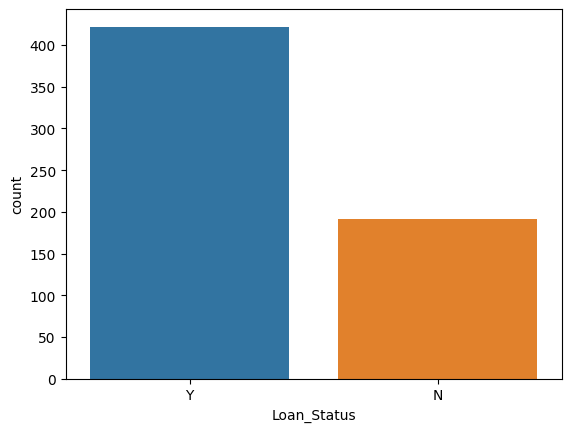

In [8]:
sns.countplot(data=train_df, x="Loan_Status")

There are more approved loans ("Y") than denied ones ("N").

<Axes: xlabel='Gender', ylabel='count'>

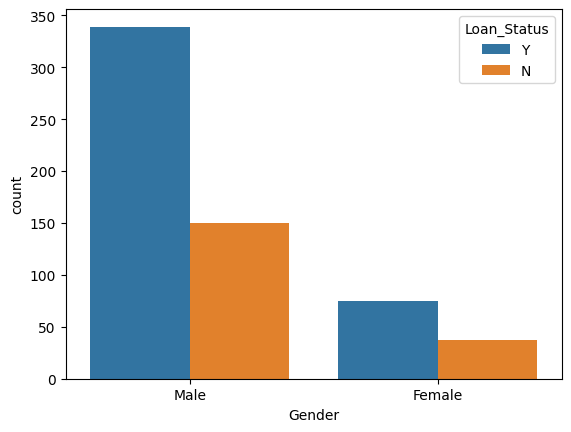

In [9]:
sns.countplot(data=train_df["Loan_Status"], x=train_df["Gender"], hue=train_df["Loan_Status"])

More males in the dataset and more approvals for males compared to females 

<Axes: xlabel='Gender', ylabel='count'>

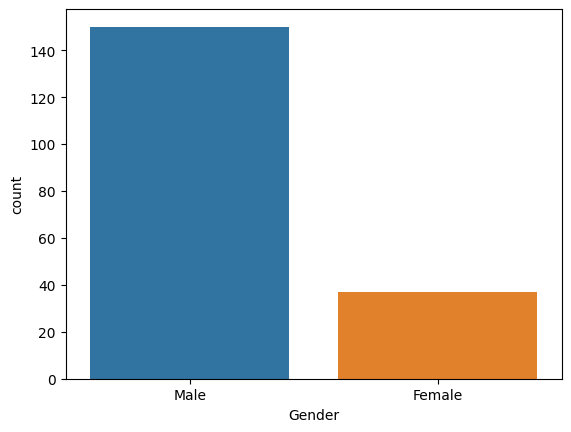

In [10]:
sns.countplot(data = train_df[train_df["Loan_Status"]=='N'], x="Gender")

<Axes: xlabel='Married', ylabel='count'>

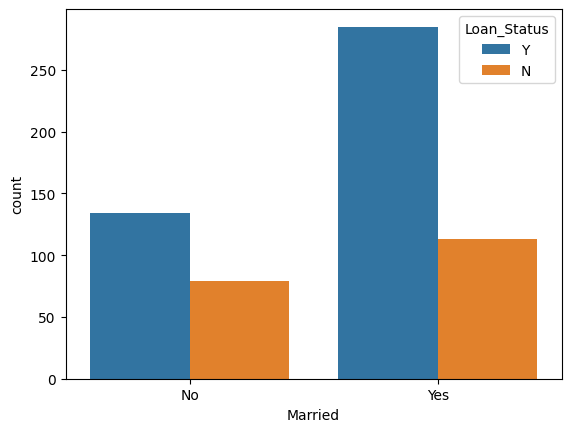

In [11]:
sns.countplot(data=train_df["Loan_Status"], x=train_df["Married"], hue=train_df["Loan_Status"])

more married getting approvals 

<Axes: >

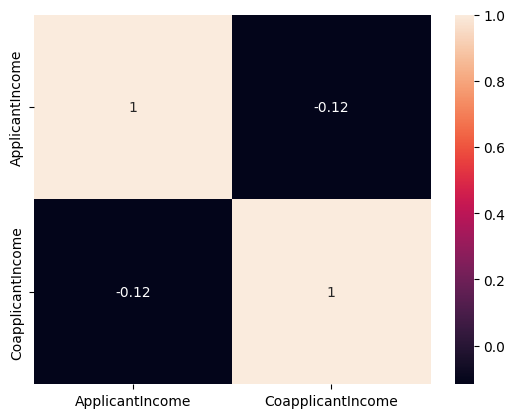

In [12]:
sns.heatmap(train_df[['ApplicantIncome','CoapplicantIncome']].corr(), annot=True)

Low correlation between applicant income and coapplicant income

<Axes: xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

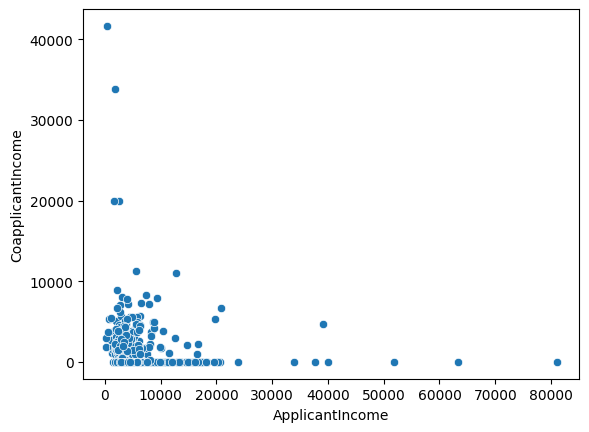

In [13]:
sns.scatterplot(x="ApplicantIncome", y="CoapplicantIncome", data=train_df)

there is some notable outliers here

<Axes: xlabel='Dependents', ylabel='LoanAmount'>

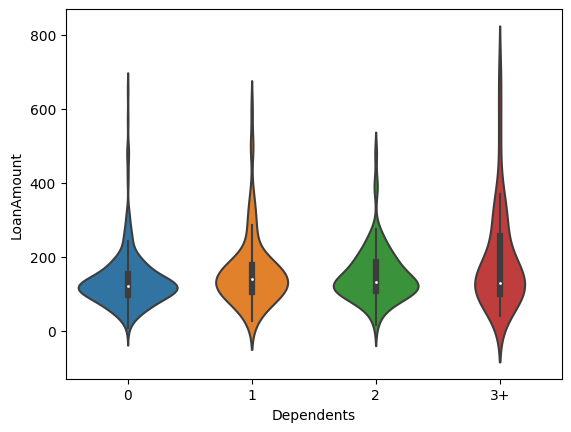

In [14]:
sns.violinplot(x=train_df["Dependents"], y=train_df["LoanAmount"])

3+ seems to have more outliers, It's noticeable that as the number of dependents increases, the distribution of loan amounts tends to spread wider

<Axes: xlabel='Dependents', ylabel='count'>

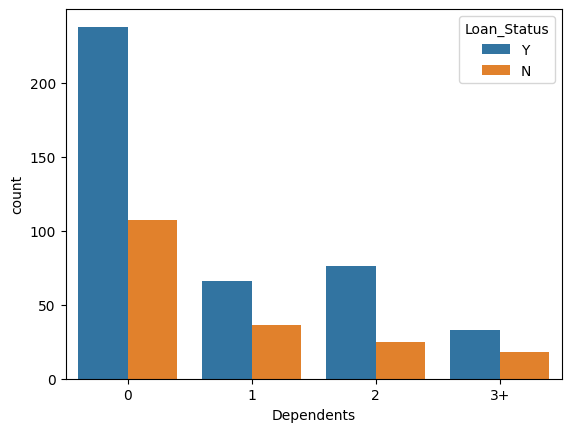

In [15]:
sns.countplot(data=train_df["Loan_Status"], x=train_df["Dependents"], hue=train_df["Loan_Status"])

people with 0 and 2 dependencies tend to get the loan more than other

<Axes: xlabel='Education', ylabel='count'>

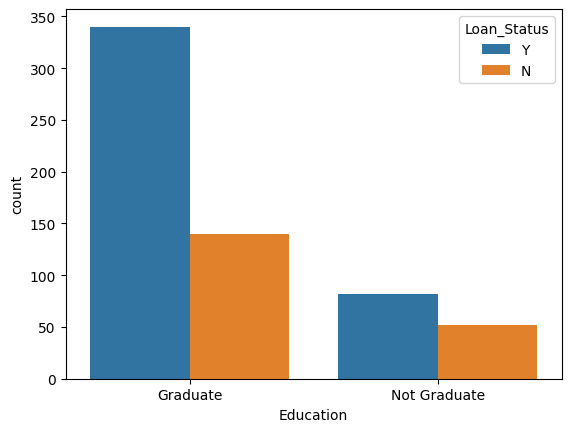

In [16]:
sns.countplot(data=train_df["Loan_Status"], x=train_df["Education"], hue=train_df["Loan_Status"])

more graduates in the dataset and they are getting more loans

<Axes: xlabel='Self_Employed', ylabel='ApplicantIncome'>

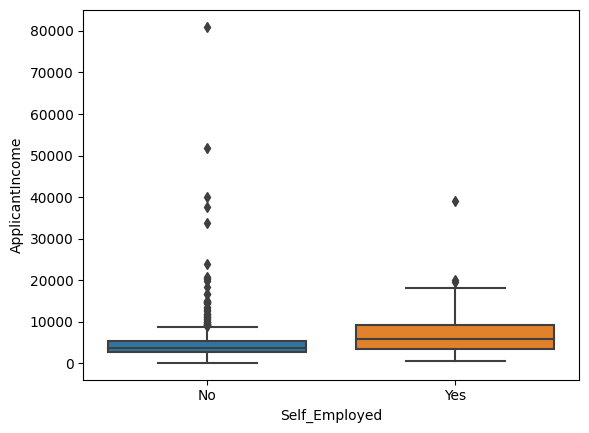

In [17]:
sns.boxplot(x ="Self_Employed",y ="ApplicantIncome", data = train_df)

 Higher median incomes among self-employed individuals could imply better qualifications for higher loan amounts, although the variability might require more thorough checks or different criteria by lenders to account for income stability.

<Axes: xlabel='Credit_History', ylabel='count'>

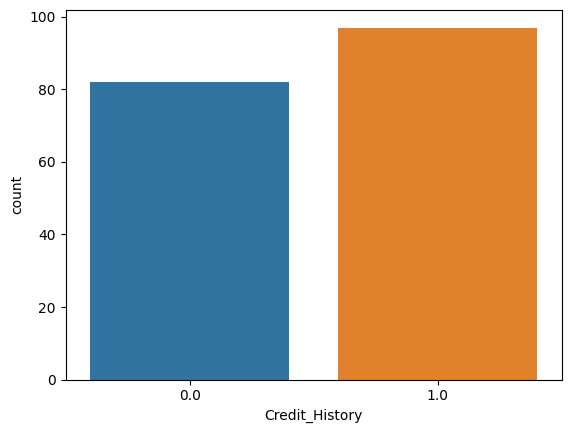

In [18]:
sns.countplot(data = train_df[train_df["Loan_Status"]=='N'], x="Credit_History")

<Axes: >

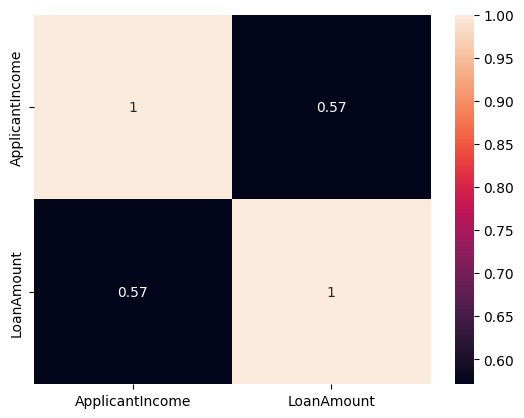

In [19]:
sns.heatmap(train_df[['ApplicantIncome','LoanAmount']].corr(), annot=True)

there is a good correlation between income and loan amount needed

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

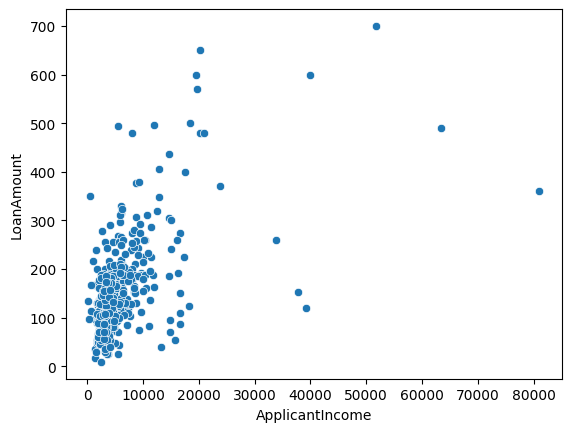

In [20]:
sns.scatterplot(x="ApplicantIncome", y="LoanAmount", data=train_df)

In [21]:
train_df.drop(['Loan_ID'], axis=1, inplace=True)
train_df.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

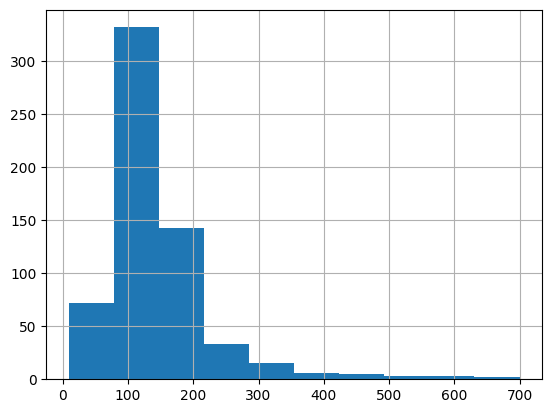

In [22]:
# Handling missing values 
train_df['Credit_History'] = train_df['Credit_History'].fillna(train_df['Credit_History'].median())
train_df['Self_Employed'] = train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0])
train_df['Dependents'] = train_df['Dependents'].fillna(train_df['Dependents'].mode()[0])
train_df['Gender'] = train_df['Gender'].fillna(train_df['Gender'].mode()[0])
train_df['Married'] = train_df['Married'].fillna(train_df['Married'].mode()[0])
train_df['LoanAmount'] = train_df['LoanAmount'].fillna(train_df['LoanAmount'].mean())


train_df['LoanAmount'].hist()




/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

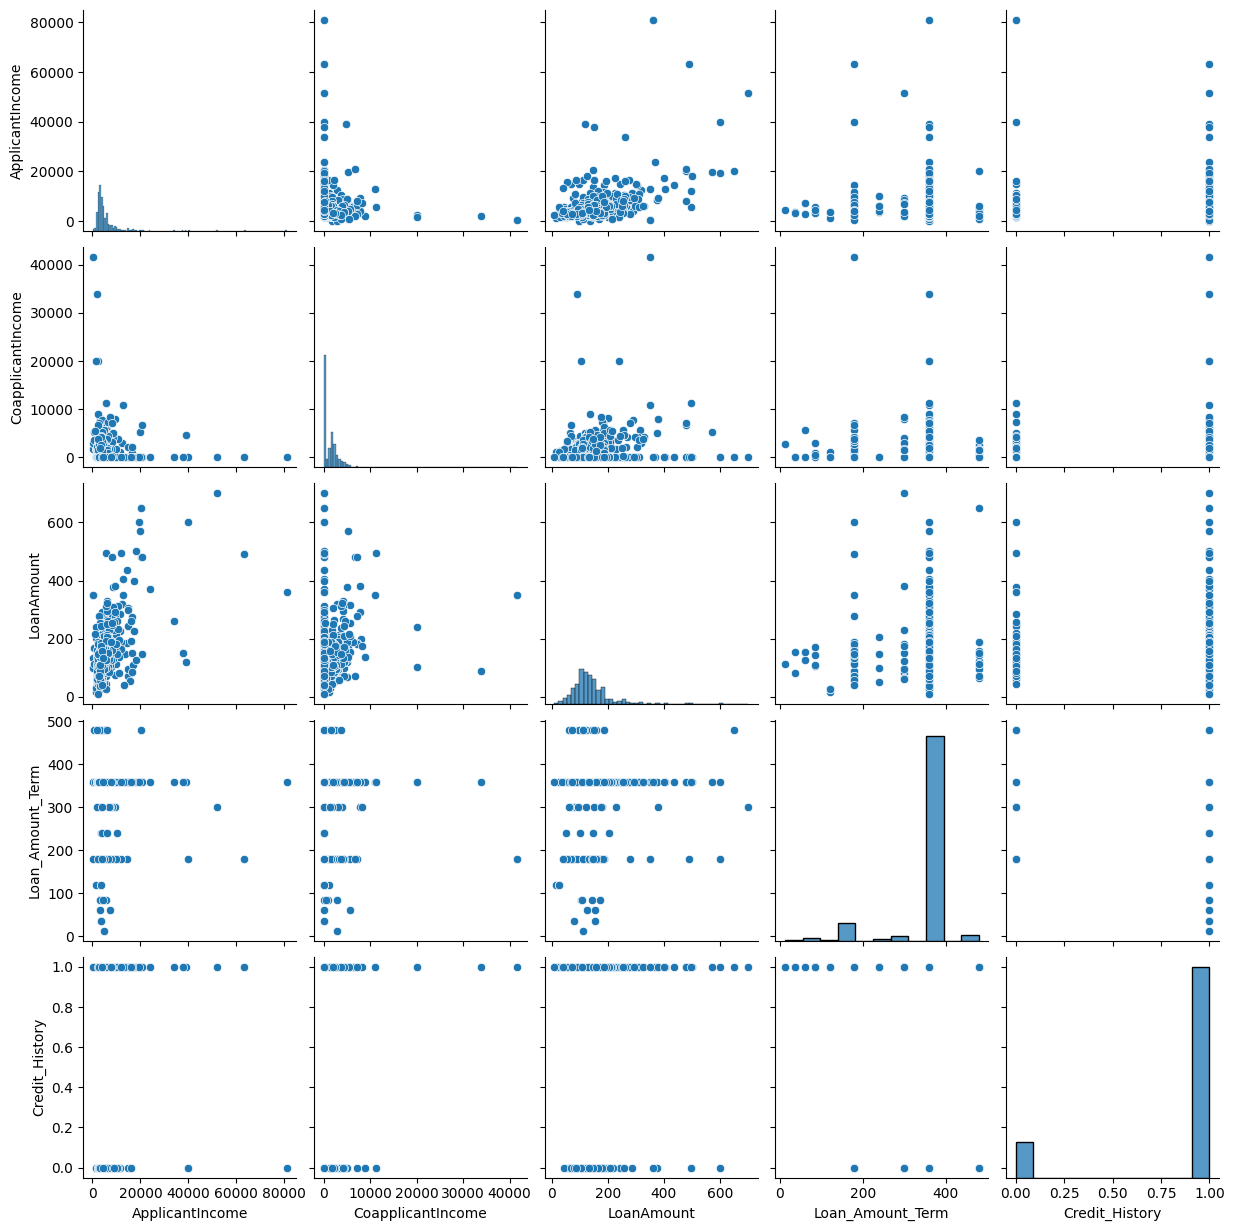

In [23]:
sns.pairplot(train_df)

In [24]:
train_df['Loan_Amount_Term'] = train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mean())

# **Now lets create the model**

In [25]:
#spliting the label from the dataset
Y = train_df.Loan_Status
Y = np.where(Y == 'Y', 1, 0)
X = pd.get_dummies(train_df.drop('Loan_Status',axis=1), drop_first = True)
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,True,False,False,False,False,False,False,False,True
1,4583,1508.0,128.000000,360.0,1.0,True,True,True,False,False,False,False,False,False
2,3000,0.0,66.000000,360.0,1.0,True,True,False,False,False,False,True,False,True
3,2583,2358.0,120.000000,360.0,1.0,True,True,False,False,False,True,False,False,True
4,6000,0.0,141.000000,360.0,1.0,True,False,False,False,False,False,False,False,True


In [26]:
Y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [27]:
# let implement Standard Scaler for more accuracy

col_names = X.columns
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X = pd.DataFrame(X_scaled, columns=col_names)
print(X.head())

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0         0.072991          -0.554487    0.000000          0.279851   
1        -0.134412          -0.038732   -0.219273          0.279851   
2        -0.393747          -0.554487   -0.957641          0.279851   
3        -0.462062           0.251980   -0.314547          0.279851   
4         0.097728          -0.554487   -0.064454          0.279851   

   Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
0        0.411733     0.472343    -1.372089     -0.446339     -0.443713   
1        0.411733     0.472343     0.728816      2.240448     -0.443713   
2        0.411733     0.472343     0.728816     -0.446339     -0.443713   
3        0.411733     0.472343     0.728816     -0.446339     -0.443713   
4        0.411733     0.472343    -1.372089     -0.446339     -0.443713   

   Dependents_3+  Education_Not Graduate  Self_Employed_Yes  \
0      -0.300975               -0.528362          -0.392601

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [29]:
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier(max_depth=3, min_samples_split=50, min_samples_leaf=20, random_state=0)))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Random Forest',  RandomForestClassifier(n_estimators=100, oob_score=True, random_state=0)))
models.append(('Neural Network', MLPClassifier(random_state=0)))

The accuracy of the Logistic Regression is 0.8374
The precision of the Logistic Regression is 0.8442
The recall of the Logistic Regression is 0.8374


The accuracy of the Decision Tree is 0.7317
The precision of the Decision Tree is 0.7512
The recall of the Decision Tree is 0.7317




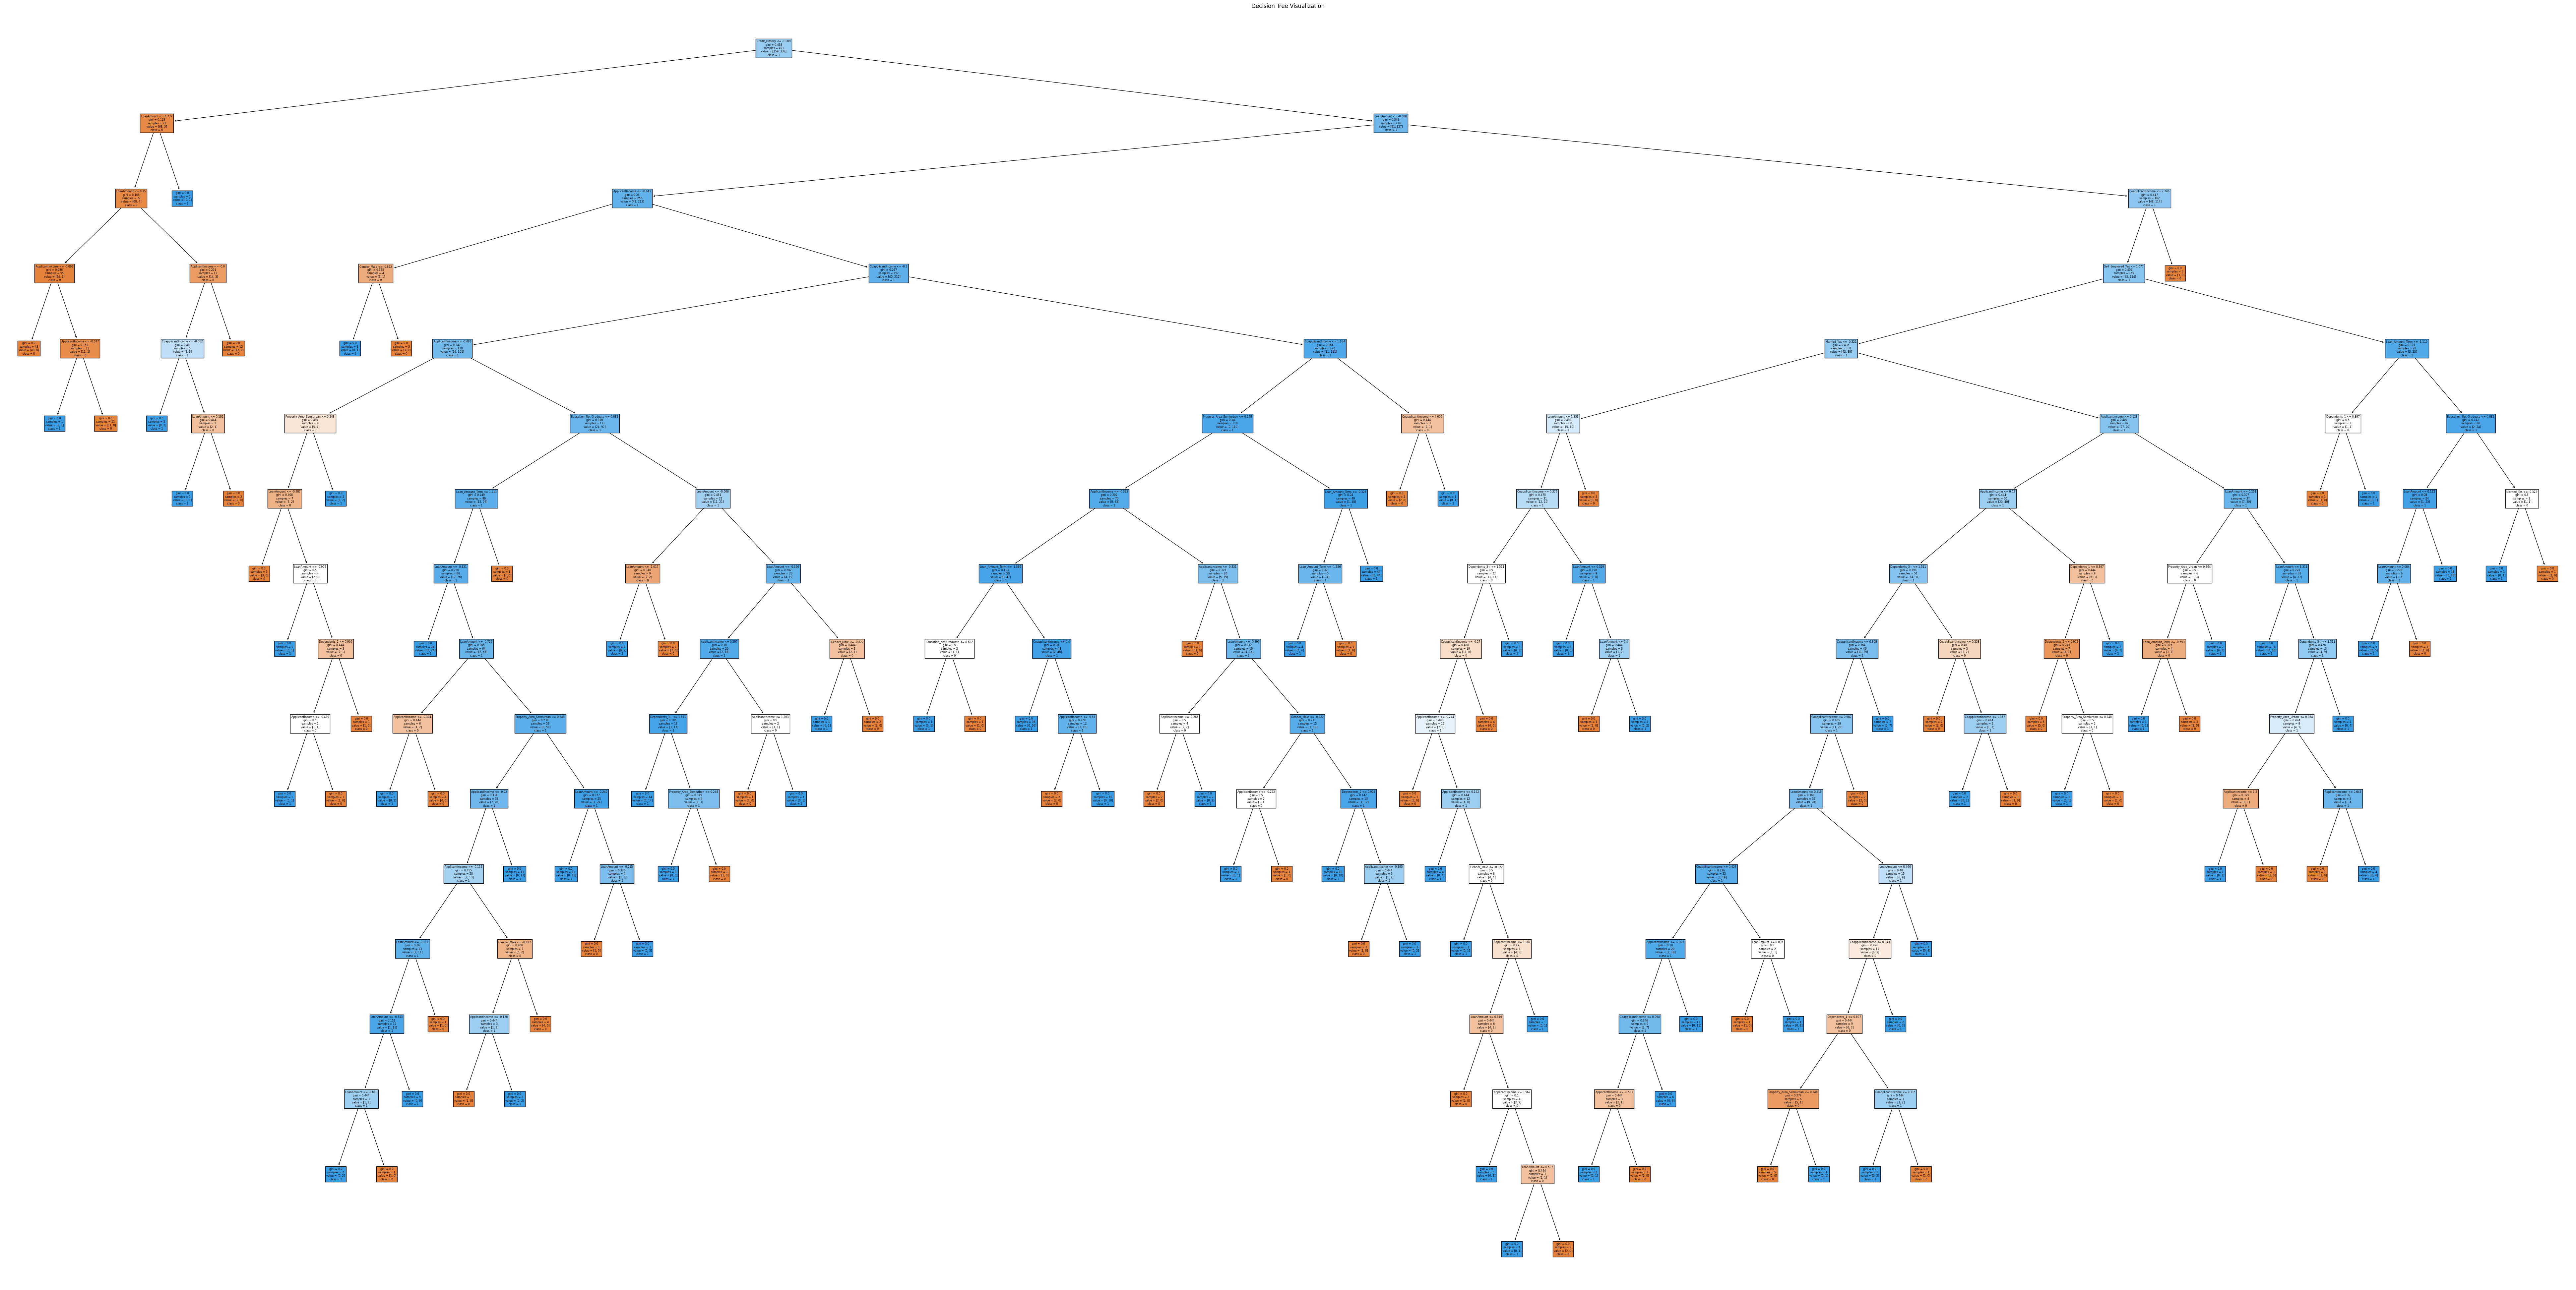

The accuracy of the Decision Tree is 0.8293
The precision of the Decision Tree is 0.8365
The recall of the Decision Tree is 0.8293




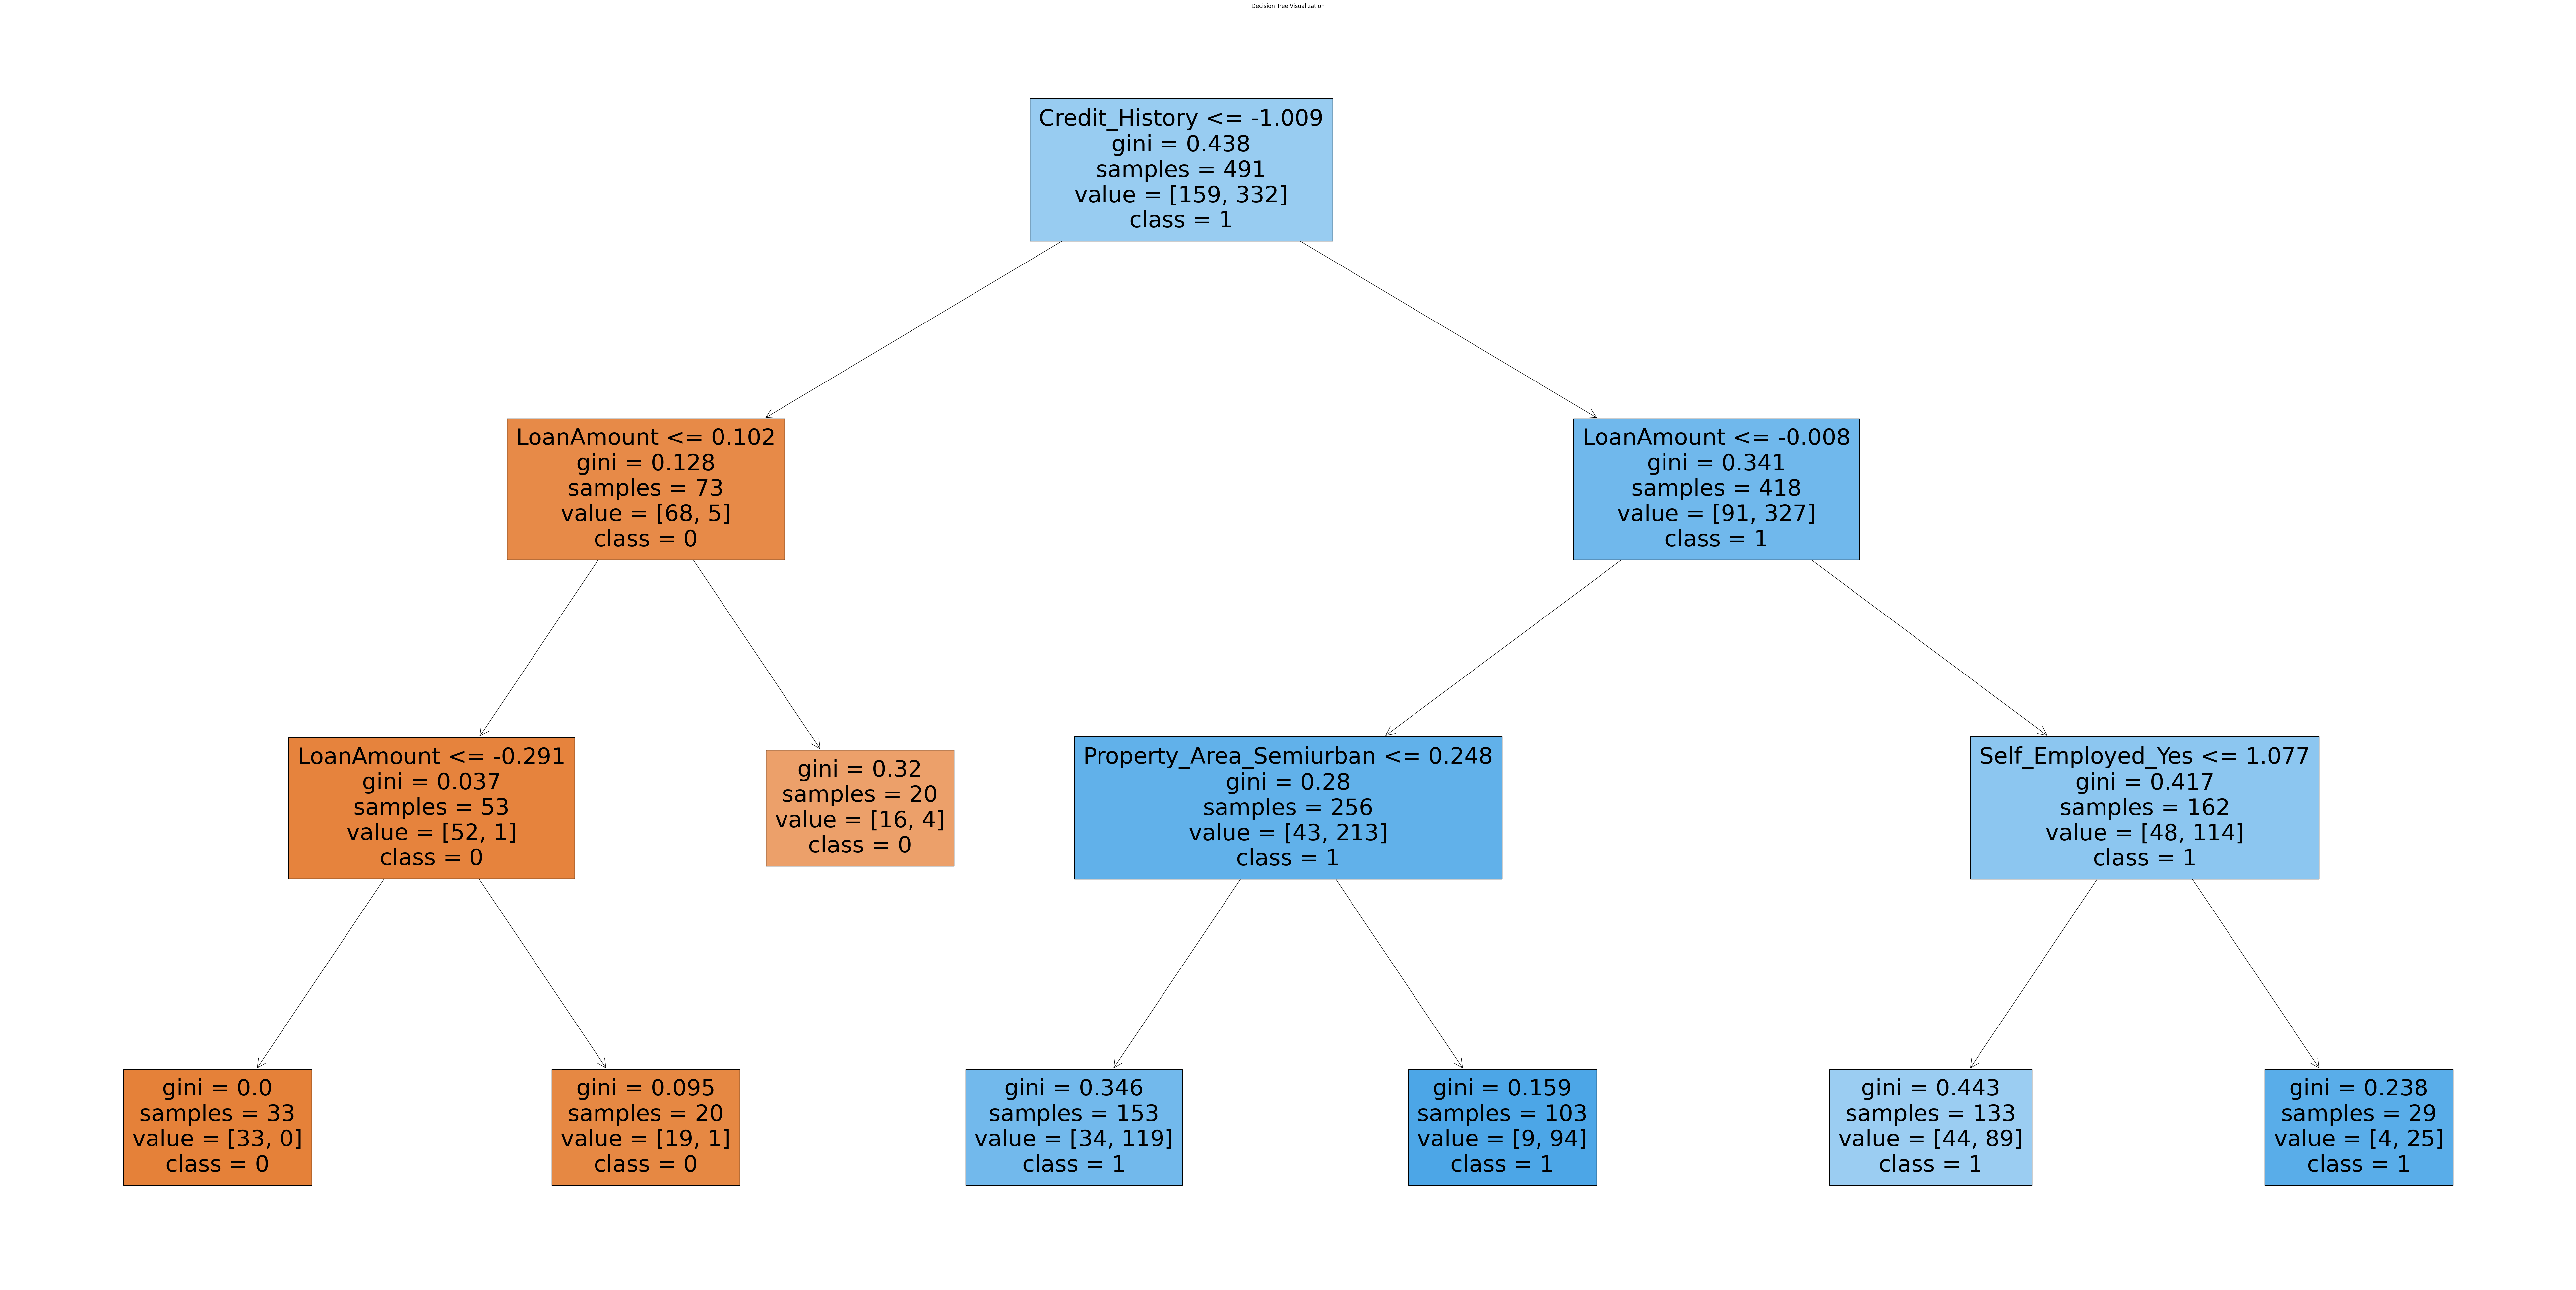

The accuracy of the Random Forest is 0.7967
The precision of the Random Forest is 0.7842
The recall of the Random Forest is 0.7967




/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too fe

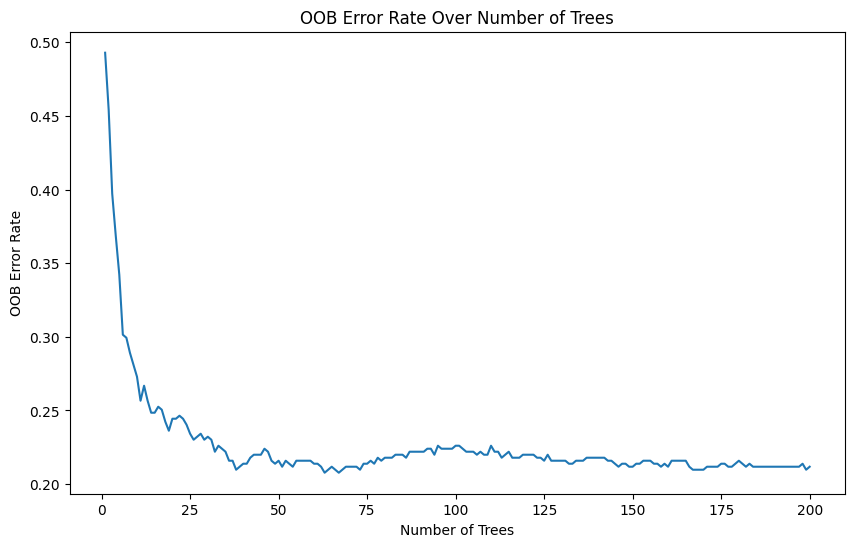

The accuracy of the Random Forest is 0.7967
The precision of the Random Forest is 0.7849
The recall of the Random Forest is 0.7967




/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too fe

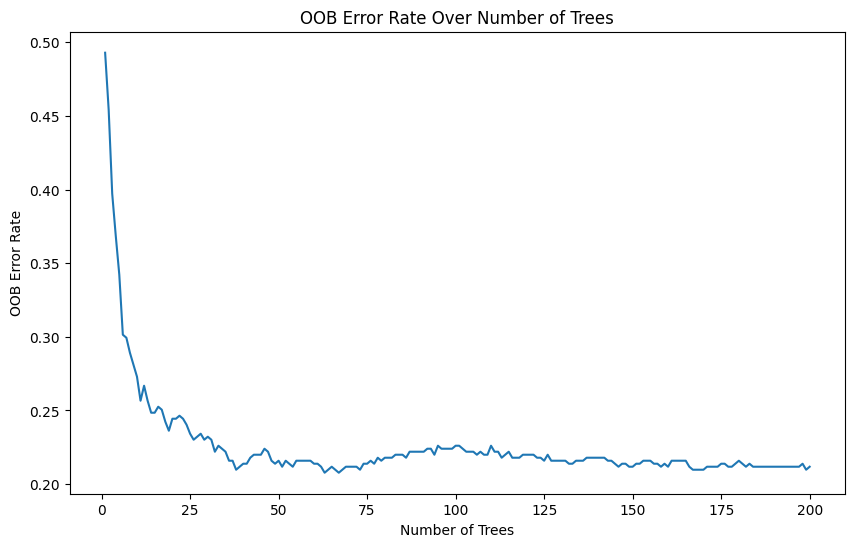

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The accuracy of the Neural Network is 0.8293
The precision of the Neural Network is 0.8222
The recall of the Neural Network is 0.8293




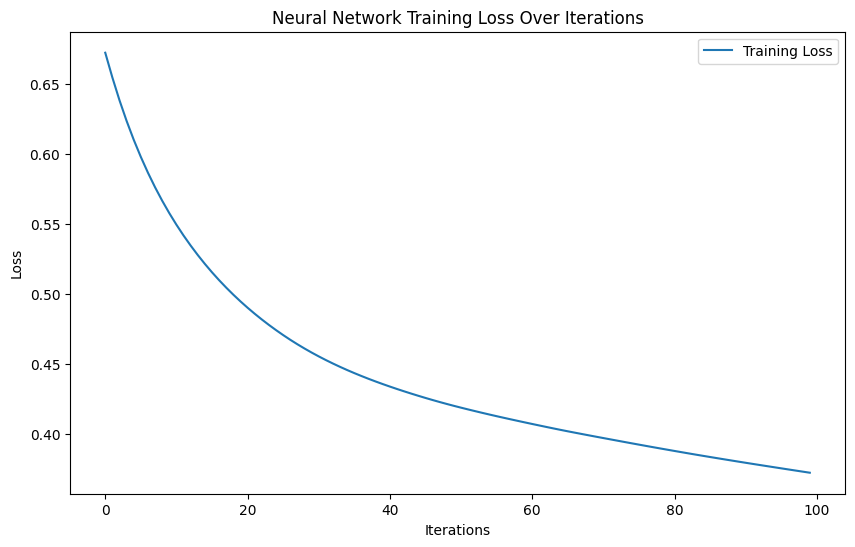

In [30]:
for name, algorithm in models:
    model = algorithm
    model.fit(X_train, Y_train)
    prediction = model.predict(X_test)
    accuracy = accuracy_score(Y_test, prediction)
    precision = precision_score(Y_test, prediction, average='weighted')
    recall = recall_score(Y_test, prediction, average='weighted')
    print(f'The accuracy of the {name} is {accuracy:.4f}')
    print(f'The precision of the {name} is {precision:.4f}')
    print(f'The recall of the {name} is {recall:.4f}')
    print('\n')
    if name == 'Decision Tree':
        plt.figure(figsize=(100, 50))  # Adjust figure size as needed
        plot_tree(model, filled=True, feature_names=X.columns, class_names=[str(cls) for cls in np.unique(Y)])
        plt.title('Decision Tree Visualization')
        plt.show()
    if name == 'Neural Network':
        model = MLPClassifier(random_state=0, max_iter=1, warm_start=True)
    
    # Manually iterate through training to simulate epochs
        n_iterations = 100  # This is akin to 'epochs'
        losses = []
        for _ in range(n_iterations):
            model.partial_fit(X_train, Y_train, classes=np.unique(Y_train))
            losses.append(model.loss_)
    
        plt.figure(figsize=(10, 6))
        plt.plot(losses, label='Training Loss')
        plt.title('Neural Network Training Loss Over Iterations')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()
    if name == 'Random Forest':
        # Model must be initialized with oob_score=True to compute OOB scores
        oob_errors = []
        for i in range(1, 201):
            rf = RandomForestClassifier(n_estimators=i, oob_score=True, random_state=0, n_jobs=-1)
            rf.fit(X_train, Y_train)
            oob_errors.append(1 - rf.oob_score_)

        plt.figure(figsize=(10, 6))
        plt.plot(range(1, 201), oob_errors)
        plt.title('OOB Error Rate Over Number of Trees')
        plt.xlabel('Number of Trees')
        plt.ylabel('OOB Error Rate')
        plt.show()

The Second Decision tree looks much better than the first one, NN, DT, LR and RF almost have the same accuracy